In [19]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

import warnings
warnings.filterwarnings("ignore")

In [20]:
def formating_name(df, remove_items=[], name=['case', 'continue', 'vote_down_ratio']):
    original_name = list(df.index)
    new_name = original_name
    for item in remove_items:
        new_name = [n.replace(item, "") for n in new_name]
    new_name = [n.split('___') for n in new_name]

    final_name = []
    for n in new_name:
        if len(n) < len(name):
            n = n + [""]*(len(name)-len(n))
        final_name.append(n)
    # new_name[new_name.index(['no_3vote'])] = ['no_3vote'] + [""]*(num-1)
    # print(pd.MultiIndex.from_tuples(new_name))
    df.index = pd.MultiIndex.from_tuples(final_name, name=name)
    return df


In [24]:
# portfolio

client = 'agg'
vote_all_kinds_return_correct_comm_csv = 'result/2022/202205v0_till202208/pp10/met_vote_ml_mpt151b_all_kinds_ext_{}.csv'.format(client)
fin_met = pd.read_csv(vote_all_kinds_return_correct_comm_csv, index_col=0)
better = fin_met.sort_values('sharpe_ratio', ascending=False)[:'no_3vote']
fin_met = formating_name(fin_met, remove_items=['202205v0_till202208_'])
show_metrics = [
    'total_return', 'annual_return', 'sharpe_ratio', 'annual_volatility', 
    'max_drawdown', 'avg_drawdown', 'return/maxdd', 'return/avgdd', 
    'up_ratio', 'buy_ratio', 'flip_ratio'
]
fin_met = fin_met[show_metrics]
fin_met.sort_values('sharpe_ratio', ascending=False)

total_return  \
case                  continue                        vote_down_ratio                   
Top5NNLow1Corr_byMSE  freqM                           vote_down_buy_0.2      3.012174   
                                                      vote_down_buy_0.3      3.062371   
                                                      vote_down_buy_0.1      2.959409   
                                                      vote_down_buy_0        2.904198   
                      freqW                           vote_down_buy_0.2      3.041632   
...                                                                               ...   
Top5AllLow1Corr_byMSE cont1quit_cont2back_rb_follow   vote_down_buy_0.1      0.698648   
                      cont1quit_cont2back_rb_lookback vote_down_buy_0        0.651141   
                      cont2_rb_follow                 vote_down_buy_0        0.675733   
                      cont1quit_cont3back_rb_follow   vote_down_buy_0        0.618566   
                      cont1quit_cont2back_rb_follow   vote_down_buy_0        0.524562   

                                                                         annual_return  \
case                  continue                        vote_down_ratio                    
Top5NNLow1Corr_byMSE  freqM                           vote_down_buy_0.2       0.100097   
                                                      vote_down_buy_0.3       0.101037   
                                                      vote_down_buy_0.1       0.099097   
                                                      vote_down_buy_0         0.098038   
                      freqW                           vote_down_buy_0.2       0.100650   
...                                                                                ...   
Top5AllLow1Corr_byMSE cont1quit_cont2back_rb_follow   vote_down_buy_0.1       0.037051   
                      cont1quit_cont2back_rb_lookback vote_down_buy_0         0.035033   
                      cont2_rb_follow                 vote_down_buy_0         0.036084   
                      cont1quit_cont3back_rb_follow   vote_down_buy_0         0.033618   
                      cont1quit_cont2back_rb_follow   vote_down_buy_0         0.029380   

                                                                         sharpe_ratio  \
case                  continue                        vote_down_ratio                   
Top5NNLow1Corr_byMSE  freqM                           vote_down_buy_0.2      0.918167   
                                                      vote_down_buy_0.3      0.916883   
                                                      vote_down_buy_0.1      0.915382   
                                                      vote_down_buy_0        0.908398   
                      freqW                           vote_down_buy_0.2      0.890797   
...                                                                               ...   
Top5AllLow1Corr_byMSE cont1quit_cont2back_rb_follow   vote_down_buy_0.1      0.386351   
                      cont1quit_cont2back_rb_lookback vote_down_buy_0        0.371056   
                      cont2_rb_follow                 vote_down_buy_0        0.367722   
                      cont1quit_cont3back_rb_follow   vote_down_buy_0        0.361759   
                      cont1quit_cont2back_rb_follow   vote_down_buy_0        0.319191   

                                                                         annual_volatility  \
case                  continue                        vote_down_ratio                        
Top5NNLow1Corr_byMSE  freqM                           vote_down_buy_0.2           0.110584   
                                                      vote_down_buy_0.3           0.111820   
                                                      vote_down_buy_0.1           0.109837   
                                                      vote_down_buy_0             0.109589   
                      

In [4]:
preds_folder = 'result/2022/202205v0_till202208/pp10/'

vote_csvs = []
for f in os.listdir(preds_folder):
    if os.path.isdir(os.path.join(preds_folder, f)):
        for ff in os.listdir(os.path.join(preds_folder, f)):
            if ff.startswith('metrics-'):
                vote_csvs.append(os.path.join(preds_folder, f, ff))

vote_csvs

['result/2022/202205v0_till202208/pp10/vote-pp10-Top10_byAccuracy-2022-Aug-24\\metrics-3voteContNdays_vs_151b.csv',
 'result/2022/202205v0_till202208/pp10/vote-pp10-Top10_byMSE-2022-Aug-24\\metrics-3voteContNdays_vs_151b.csv',
 'result/2022/202205v0_till202208/pp10/vote-pp10-Top5AllLow1Corr_byAccuracy-2022-Aug-24\\metrics-3voteContNdays_vs_151b.csv',
 'result/2022/202205v0_till202208/pp10/vote-pp10-Top5AllLow1Corr_byMSE-2022-Aug-24\\metrics-3voteContNdays_vs_151b.csv',
 'result/2022/202205v0_till202208/pp10/vote-pp10-Top5NNLow1Corr_byAccuracy-2022-Aug-24\\metrics-3voteContNdays_vs_151b.csv',
 'result/2022/202205v0_till202208/pp10/vote-pp10-Top5NNLow1Corr_byMSE-2022-Aug-24\\metrics-3voteContNdays_vs_151b.csv',
 'result/2022/202205v0_till202208/pp10/vote-pp10-Top5_byAccuracy-2022-Aug-24\\metrics-3voteContNdays_vs_151b.csv',
 'result/2022/202205v0_till202208/pp10/vote-pp10-Top5_byMSE-2022-Aug-24\\metrics-3voteContNdays_vs_151b.csv',
 'result/2022/202205v0_till202208/pp10/vote-pp10-voteAll

In [5]:
# ML vs portfolio no_3vote

ml2portfolio_met = []
for vote_file in vote_csvs:
    ml2portfolio_met_sub = pd.read_csv(vote_file, index_col=0, header=[0, 1])[client]
    ml2portfolio_met_sub = formating_name(ml2portfolio_met_sub, remove_items=['202205v0_till202208_'], name=['case', 'continue'])
    ml2portfolio_met.append(ml2portfolio_met_sub)
ml2portfolio_met_df = pd.concat(ml2portfolio_met)
ml2portfolio_met_df = ml2portfolio_met_df[~ml2portfolio_met_df.index.duplicated(keep='first')]
ml2portfolio_met_df

accuracy  precision  \
case             continue                                               
no_3vote                                          0.553406   0.553406   
Top10_byAccuracy freqW                            0.534877   0.557569   
                 freqM                            0.529973   0.555076   
                 cont1_rb_lookback                0.532425   0.555360   
                 cont1_rb_follow                  0.532425   0.555360   
...                                                    ...        ...   
voteAll_SD       cont4quit_cont2back_rb_follow    0.528883   0.552908   
                 cont4quit_cont3back_rb_lookback  0.530245   0.555077   
                 cont4quit_cont3back_rb_follow    0.529155   0.555556   
                 cont4_rb_lookback                0.527248   0.555224   
                 cont4_rb_follow                  0.526158   0.554970   

                                                    recall   recall0  \
case             continue                                              
no_3vote                                          1.000000  0.000000   
Top10_byAccuracy freqW                            0.772526  0.240390   
                 freqM                            0.759232  0.245882   
                 cont1_rb_lookback                0.777942  0.228188   
                 cont1_rb_follow                  0.777942  0.228188   
...                                                    ...       ...   
voteAll_SD       cont4quit_cont2back_rb_follow    0.776957  0.221477   
                 cont4quit_cont3back_rb_lookback  0.761694  0.243441   
                 cont4quit_cont3back_rb_follow    0.745938  0.260525   
                 cont4_rb_lookback                0.732644  0.272727   
                 cont4_rb_follow                  0.725751  0.278829   

                                                  f1_score  f0_score  
case             continue                                             
no_3vote                                          0.712507  0.000000  
Top10_byAccuracy freqW                            0.647678  0.315832  
                 freqM                            0.641298  0.318451  
                 cont1_rb_lookback                0.648072  0.303571  
                 cont1_rb_follow                  0.648072  0.303571  
...                                                    ...       ...  
voteAll_SD       cont4quit_cont2back_rb_follow    0.646059  0.295723  
                 cont4quit_cont3back_rb_lookback  0.642175  0.316416  
                 cont4quit_cont3back_rb_follow    0.636822  0.330751  
                 cont4_rb_lookback                0.631713  0.340053  
                 cont4_rb_follow                  0.628974  0.344516  

[307 rows x 6 columns]

In [6]:
renew_ml2portfolio_met = []
for idx in ml2portfolio_met_df.index:
    # display(idx)
    tmp = ml2portfolio_met_df.loc[[idx], :]
    # display(tmp)
    comb_tmp = fin_met.xs(idx, level=[0, 1])
    # display(comb_tmp)
    tmp_list = [tmp]*len(comb_tmp.index)
    tmp_df = pd.concat(tmp_list)
    # display(tmp_df)
    # display(pd.MultiIndex.from_product([[idx[0]], [idx[1]], list(comb_tmp.index)]))
    tmp_df.index = pd.MultiIndex.from_product([[idx[0]], [idx[1]], list(comb_tmp.index)])
    # display(tmp_df)
    renew_ml2portfolio_met.append(tmp_df)
renew_ml2portfolio_met_df = pd.concat(renew_ml2portfolio_met)
renew_ml2portfolio_met_df

accuracy  precision  \
no_3vote                                              0.553406   0.553406   
Top10_byAccuracy freqW             vote_down_buy_0    0.534877   0.557569   
                                   vote_down_buy_0.1  0.534877   0.557569   
                                   vote_down_buy_0.2  0.534877   0.557569   
                                   vote_down_buy_0.3  0.534877   0.557569   
...                                                        ...        ...   
voteAll_SD       cont4_rb_lookback vote_down_buy_0.3  0.527248   0.555224   
                 cont4_rb_follow   vote_down_buy_0    0.526158   0.554970   
                                   vote_down_buy_0.1  0.526158   0.554970   
                                   vote_down_buy_0.2  0.526158   0.554970   
                                   vote_down_buy_0.3  0.526158   0.554970   

                                                        recall   recall0  \
no_3vote                                              1.000000  0.000000   
Top10_byAccuracy freqW             vote_down_buy_0    0.772526  0.240390   
                                   vote_down_buy_0.1  0.772526  0.240390   
                                   vote_down_buy_0.2  0.772526  0.240390   
                                   vote_down_buy_0.3  0.772526  0.240390   
...                                                        ...       ...   
voteAll_SD       cont4_rb_lookback vote_down_buy_0.3  0.732644  0.272727   
                 cont4_rb_follow   vote_down_buy_0    0.725751  0.278829   
                                   vote_down_buy_0.1  0.725751  0.278829   
                                   vote_down_buy_0.2  0.725751  0.278829   
                                   vote_down_buy_0.3  0.725751  0.278829   

                                                      f1_score  f0_score  
no_3vote                                              0.712507  0.000000  
Top10_byAccuracy freqW             vote_down_buy_0    0.647678  0.315832  
                                   vote_down_buy_0.1  0.647678  0.315832  
                                   vote_down_buy_0.2  0.647678  0.315832  
                                   vote_down_buy_0.3  0.647678  0.315832  
...                                                        ...       ...  
voteAll_SD       cont4_rb_lookback vote_down_buy_0.3  0.631713  0.340053  
                 cont4_rb_follow   vote_down_buy_0    0.628974  0.344516  
                                   vote_down_buy_0.1  0.628974  0.344516  
                                   vote_down_buy_0.2  0.628974  0.344516  
                                   vote_down_buy_0.3  0.628974  0.344516  

[1225 rows x 6 columns]

In [7]:
# ML metrics
ml_metircs_file = './result/2022/202205v0_till202208/pp10/ML_preformance(daily).csv'
ml_metircs_df = pd.read_csv(ml_metircs_file, index_col=[1, 0])
ml_metircs_df = ml_metircs_df.loc['Mean', :]
ml_metircs_df

,accuracy,precision,recall,recall0,f1_score,f0_score,MSE,MSE_fullscore,MSE_byProba,MSE_fullscore_byReturn
Top5_byMSE,0.506986,0.525543,0.661748,0.332136,0.585653,0.387465,1.261041,0.519972,1.126130,1.218853
Top10_byMSE,0.508710,0.524761,0.713605,0.278128,0.604723,0.347433,1.242935,0.519972,1.090879,1.218853
Top5NNLow1Corr_byAccuracy,0.528216,0.539523,0.712899,0.320797,0.614171,0.390755,1.219394,0.519972,1.089424,1.218853
Top5AllLow1Corr_byMSE,0.513791,0.529808,0.692439,0.312617,0.600148,0.376272,1.242178,0.519972,1.099394,1.218853
voteAll_SD,0.516422,0.531929,0.682634,0.328540,0.597719,0.389278,1.232237,0.519972,1.095049,1.218853
Top10_byAccuracy,0.509799,0.526050,0.705129,0.289598,0.602392,0.356283,1.242209,0.519972,1.085478,1.218853
Top5AllLow1Corr_byAccuracy,0.513246,0.528827,0.700626,0.302016,0.602332,0.367052,1.231093,0.519972,1.093791,1.218853
Top5NNLow1Corr_byMSE,0.523226,0.535545,0.711102,0.312236,0.610953,0.382320,1.227031,0.519972,1.092432,1.218853
Top5_byAccuracy,0.513518,0.529366,0.674063,0.331968,0.592803,0.391208,1.237703,0.519972,1.119612,1.218853


In [8]:
renew_ml_metircs = []
for idx in ml_metircs_df.index:
    tmp = ml_metircs_df.loc[[idx], :]
    comb_tmp = fin_met.loc[idx, :]
    tmp_list = [tmp]*len(comb_tmp.index)
    tmp_df = pd.concat(tmp_list)
    tmp_df[list(comb_tmp.index.names)] = comb_tmp.index.to_frame(name=comb_tmp.index.names)[list(comb_tmp.index.names)].values
    tmp_df.index.name = 'case'
    tmp_df = tmp_df.reset_index(drop=False)
    tmp_df = tmp_df.set_index(['case'] + list(comb_tmp.index.names))

    renew_ml_metircs.append(tmp_df)
renew_ml_metircs_df = pd.concat(renew_ml_metircs)
renew_ml_metircs_df

accuracy  \
case            continue                        vote_down_ratio               
Top5_byMSE      freqW                           vote_down_buy_0    0.506986   
                freqM                           vote_down_buy_0    0.506986   
                cont1_rb_lookback               vote_down_buy_0    0.506986   
                cont1_rb_follow                 vote_down_buy_0    0.506986   
                cont1quit_cont2back_rb_lookback vote_down_buy_0    0.506986   
...                                                                     ...   
Top5_byAccuracy cont4quit_cont2back_rb_follow   vote_down_buy_0.3  0.513518   
                cont4quit_cont3back_rb_lookback vote_down_buy_0.3  0.513518   
                cont4quit_cont3back_rb_follow   vote_down_buy_0.3  0.513518   
                cont4_rb_lookback               vote_down_buy_0.3  0.513518   
                cont4_rb_follow                 vote_down_buy_0.3  0.513518   

                                                                   precision  \
case            continue                        vote_down_ratio                
Top5_byMSE      freqW                           vote_down_buy_0     0.525543   
                freqM                           vote_down_buy_0     0.525543   
                cont1_rb_lookback               vote_down_buy_0     0.525543   
                cont1_rb_follow                 vote_down_buy_0     0.525543   
                cont1quit_cont2back_rb_lookback vote_down_buy_0     0.525543   
...                                                                      ...   
Top5_byAccuracy cont4quit_cont2back_rb_follow   vote_down_buy_0.3   0.529366   
                cont4quit_cont3back_rb_lookback vote_down_buy_0.3   0.529366   
                cont4quit_cont3back_rb_follow   vote_down_buy_0.3   0.529366   
                cont4_rb_lookback               vote_down_buy_0.3   0.529366   
                cont4_rb_follow                 vote_down_buy_0.3   0.529366   

                                                                     recall  \
case            continue                        vote_down_ratio               
Top5_byMSE      freqW                           vote_down_buy_0    0.661748   
                freqM                           vote_down_buy_0    0.661748   
                cont1_rb_lookback               vote_down_buy_0    0.661748   
                cont1_rb_follow                 vote_down_buy_0    0.661748   
                cont1quit_cont2back_rb_lookback vote_down_buy_0    0.661748   
...                                                                     ...   
Top5_byAccuracy cont4quit_cont2back_rb_follow   vote_down_buy_0.3  0.674063   
                cont4quit_cont3back_rb_lookback vote_down_buy_0.3  0.674063   
                cont4quit_cont3back_rb_follow   vote_down_buy_0.3  0.674063   
                cont4_rb_lookback               vote_down_buy_0.3  0.674063   
                cont4_rb_follow                 vote_down_buy_0.3  0.674063   

                                                                    recall0  \
case            continue                        vote_down_ratio               
Top5_byMSE      freqW                           vote_down_buy_0    0.332136   
                freqM                           vote_down_buy_0    0.332136   
                cont1_rb_lookback               vote_down_buy_0    0.332136   
                cont1_rb_follow                 vote_down_buy_0    0.332136   
                cont1quit_cont2back_rb_lookback vote_down_buy_0    0.332136   
...                                                                     ...   
Top5_byAccuracy cont4quit_cont2back_rb_follow   vote_down_buy_0.3  0.331968   
                cont4quit_cont3back_rb_lookback vote_down_buy_0.3  0.331968   
                cont4quit_cont3back_rb_follow   vote_down_buy_0.3  0.331968   
                cont4_rb_lookback               vote_down_buy_0.3  0.331968   
                cont4_

In [9]:
comb = {
    'fin_met': fin_met,
    'ml2portfolio_met': renew_ml2portfolio_met_df,
    'ml2asset_met': renew_ml_metircs_df
}

comb_df = pd.concat(comb.values(), keys=comb.keys(), axis=1)
comb_df.index.names = ['case', 'continue', 'vote_down_ratio']

In [100]:
comb_df.to_csv('./result/2022/202205v0_till202208/pp10/combind_result_{}.csv'.format(client))

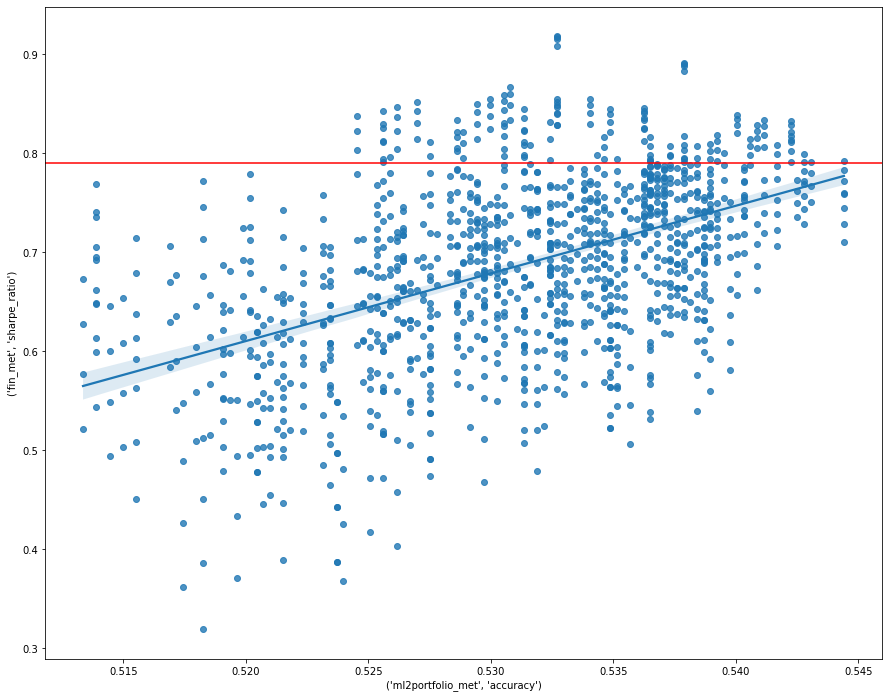

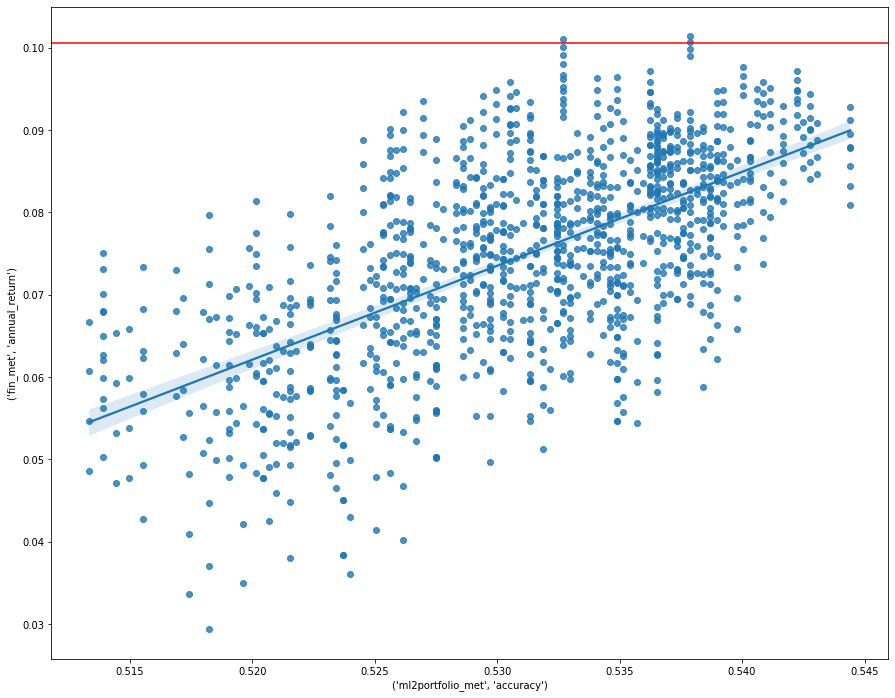

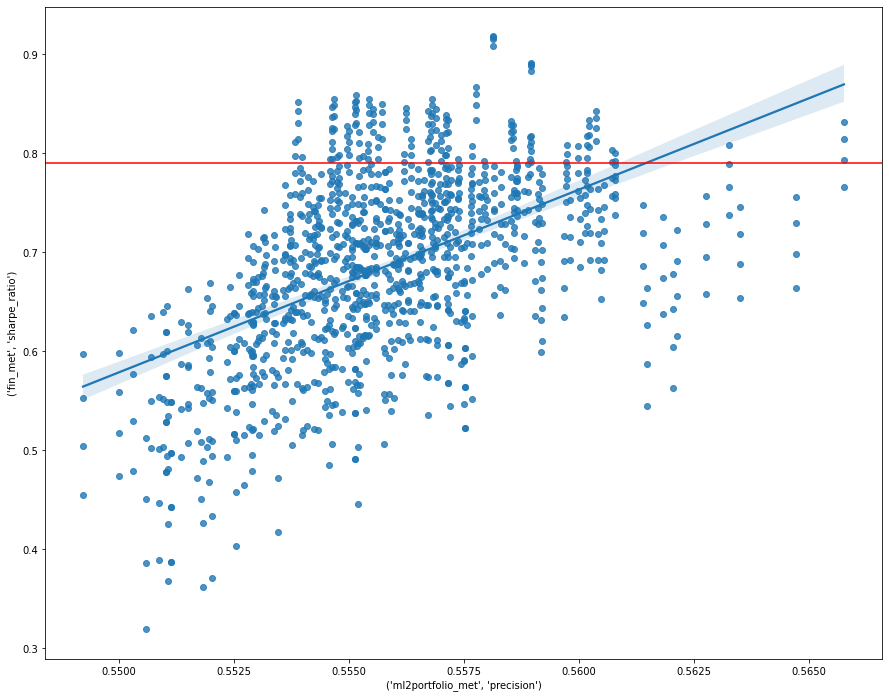

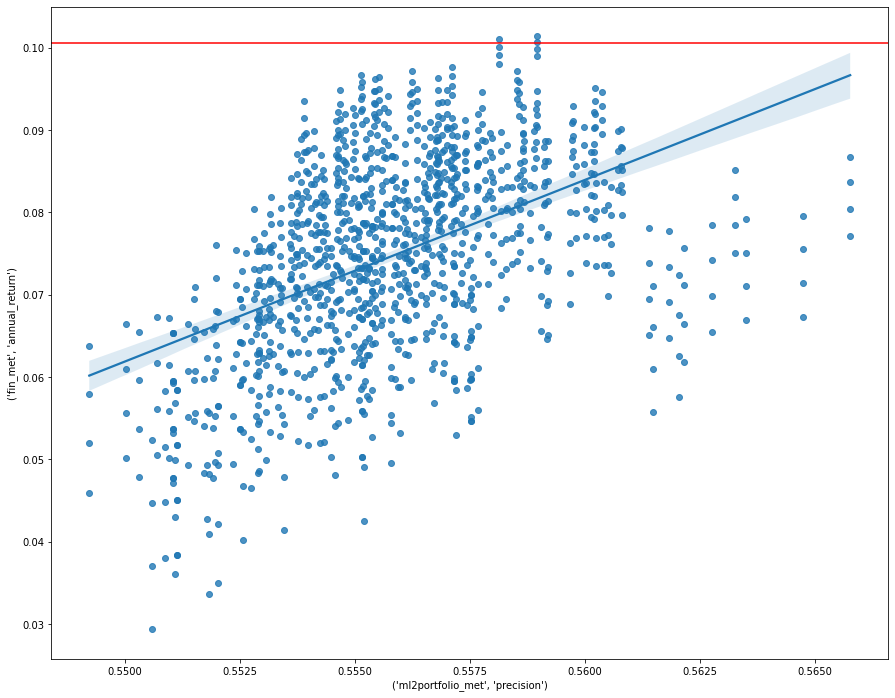

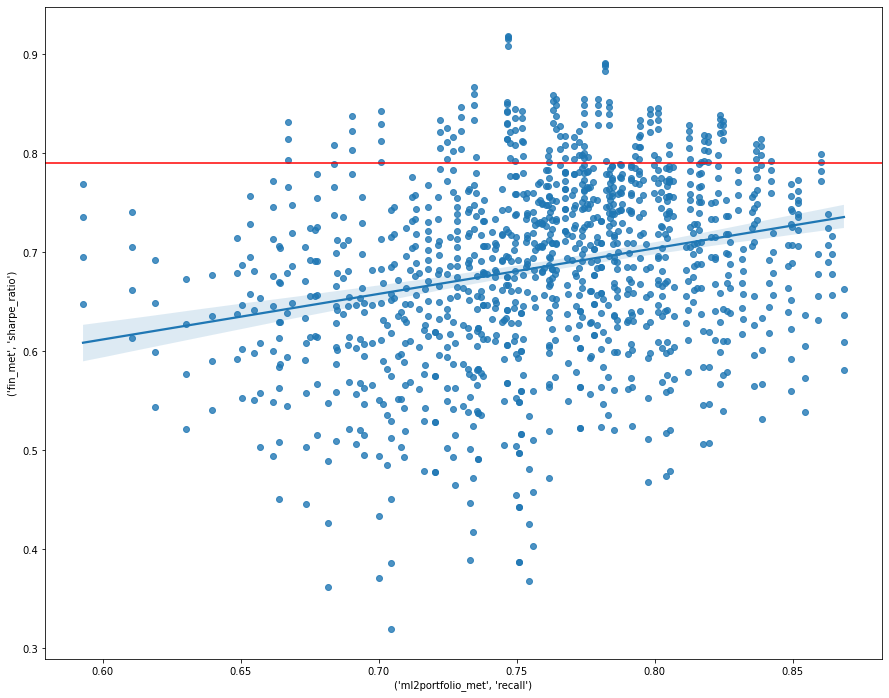

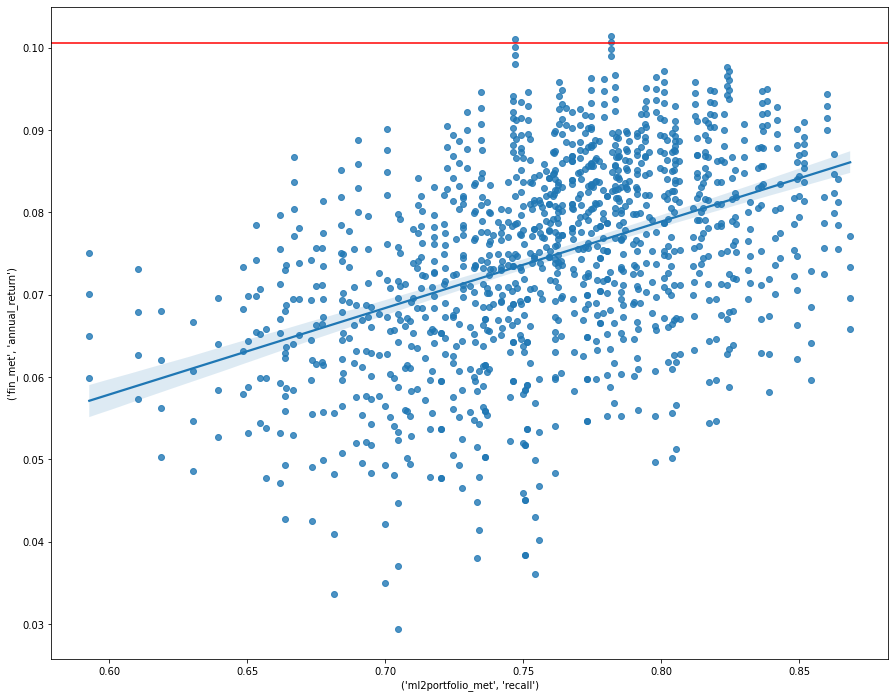

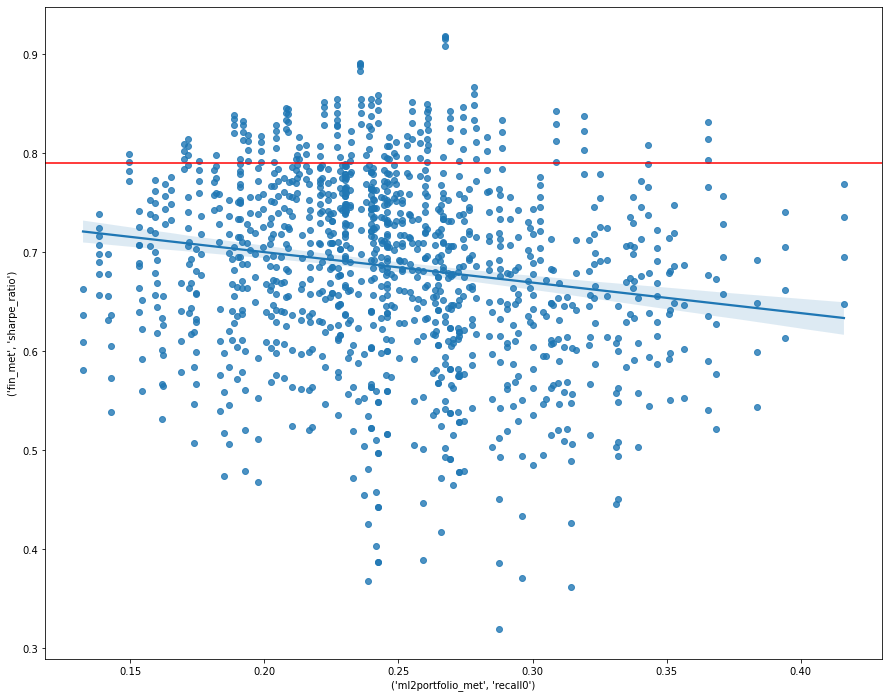

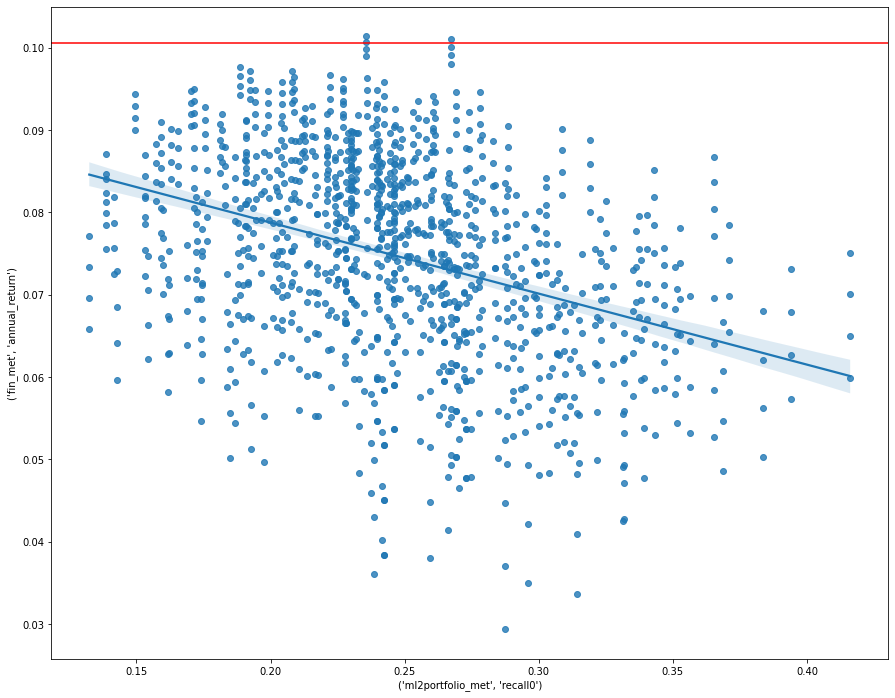

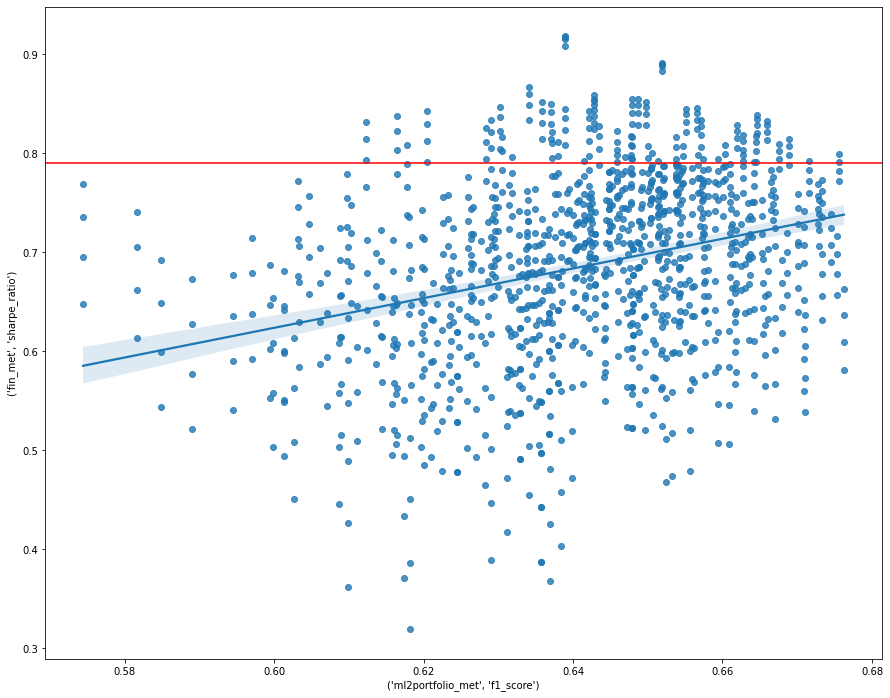

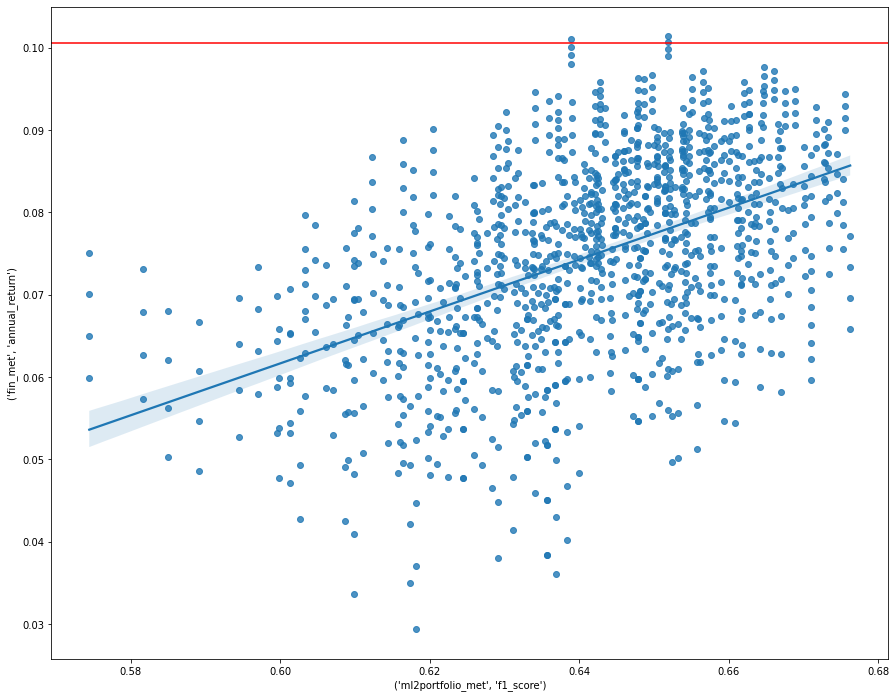

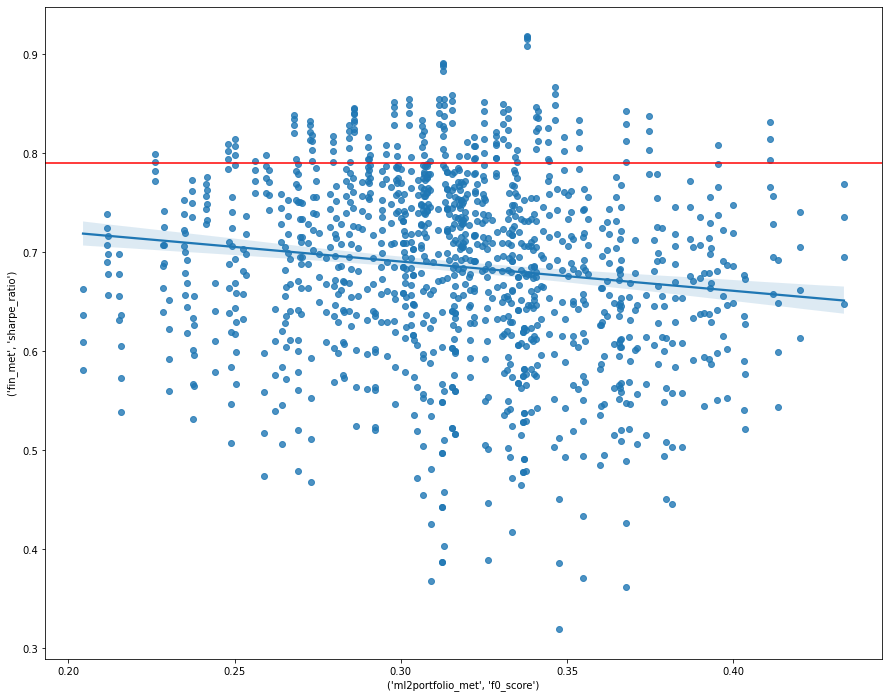

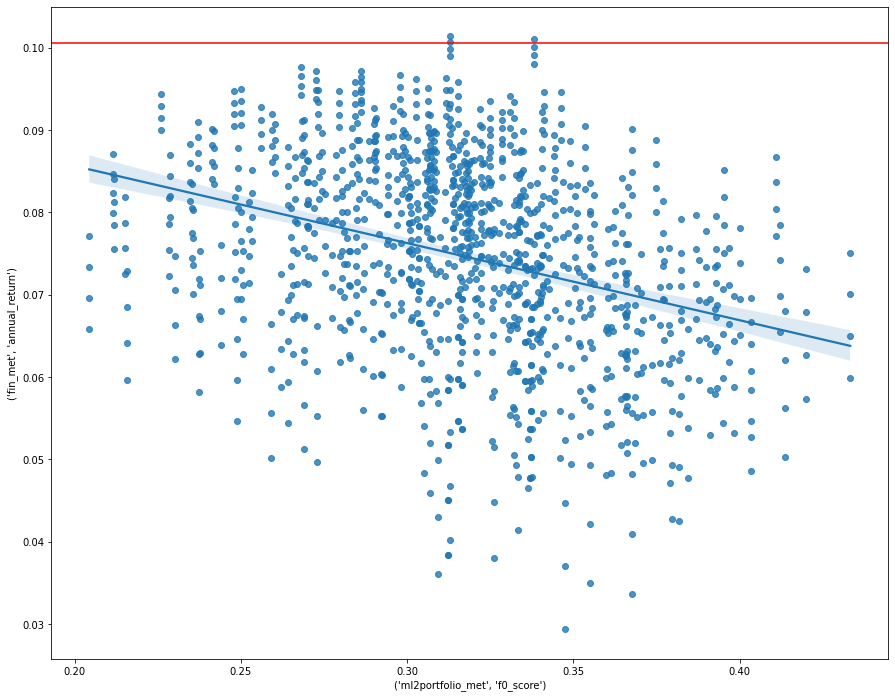

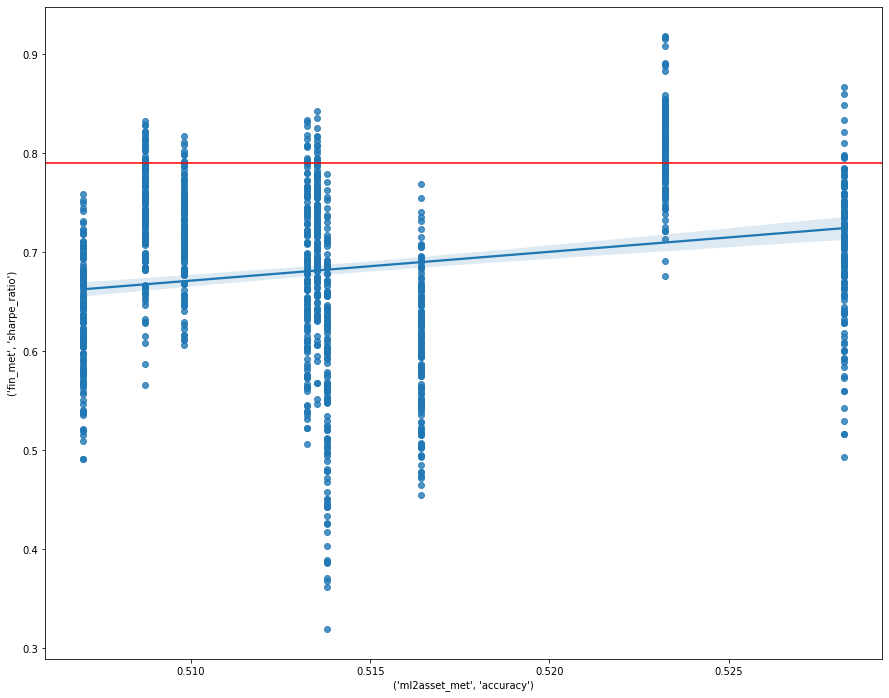

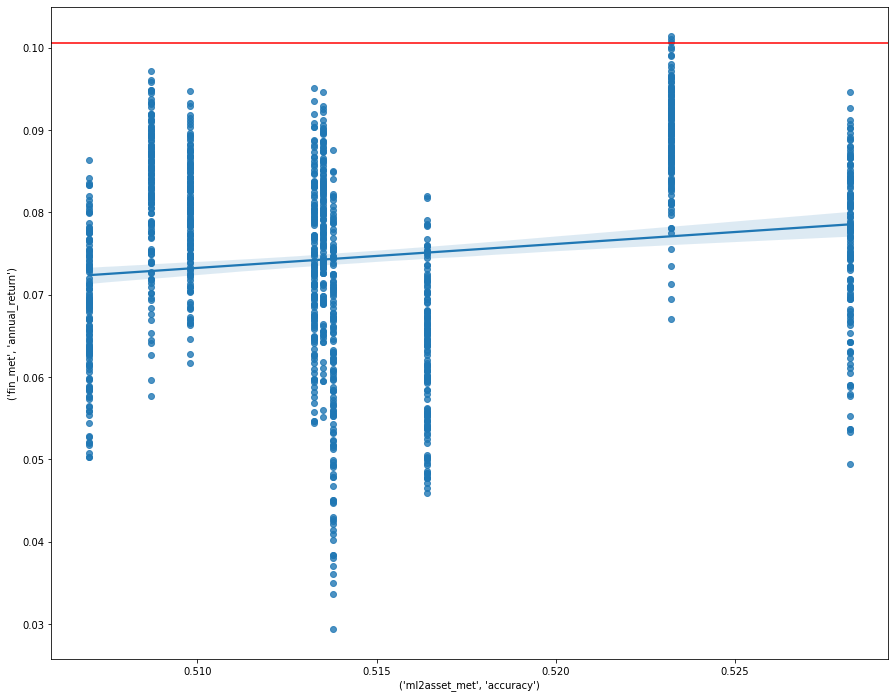

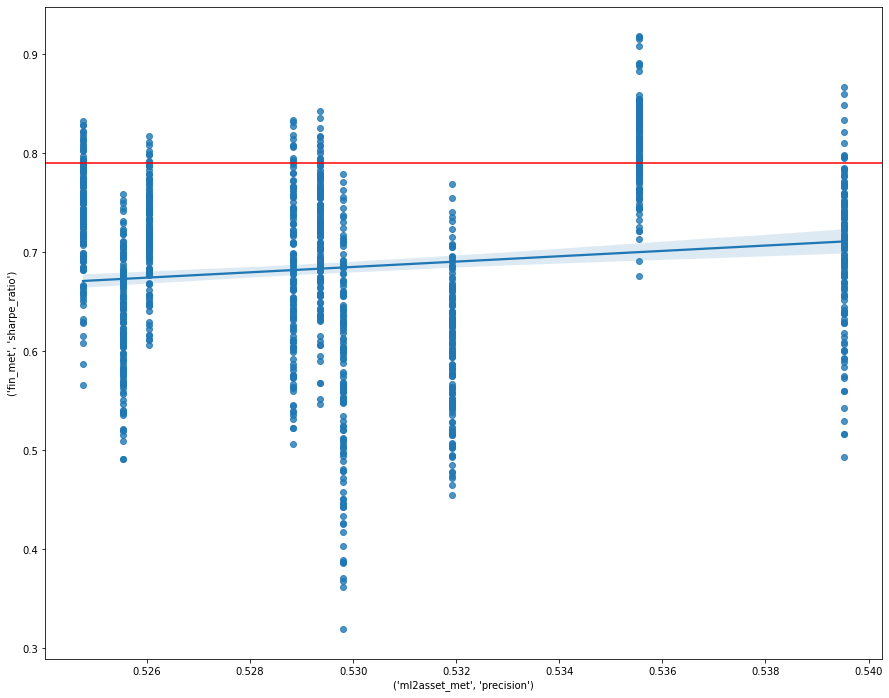

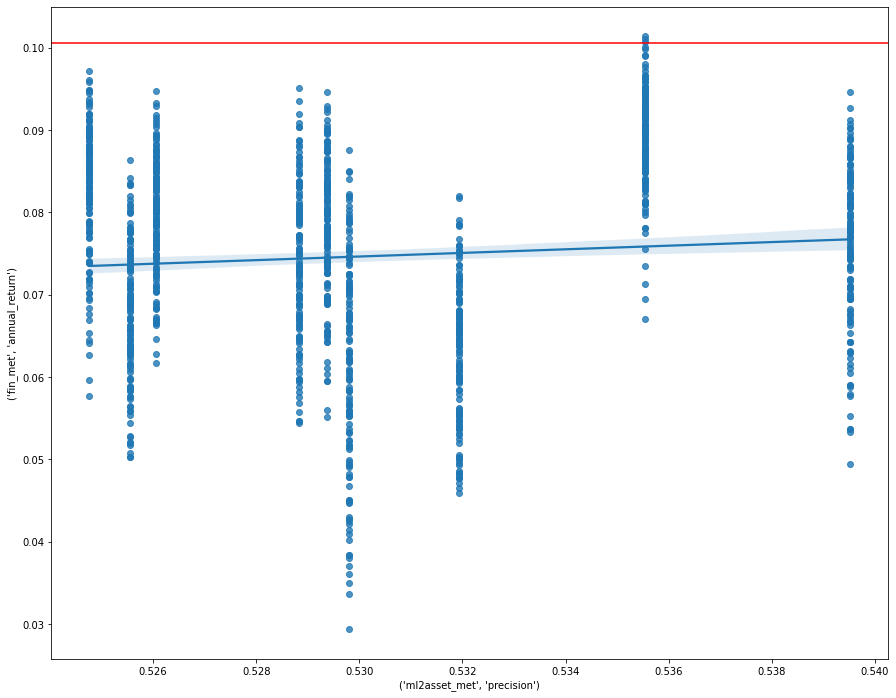

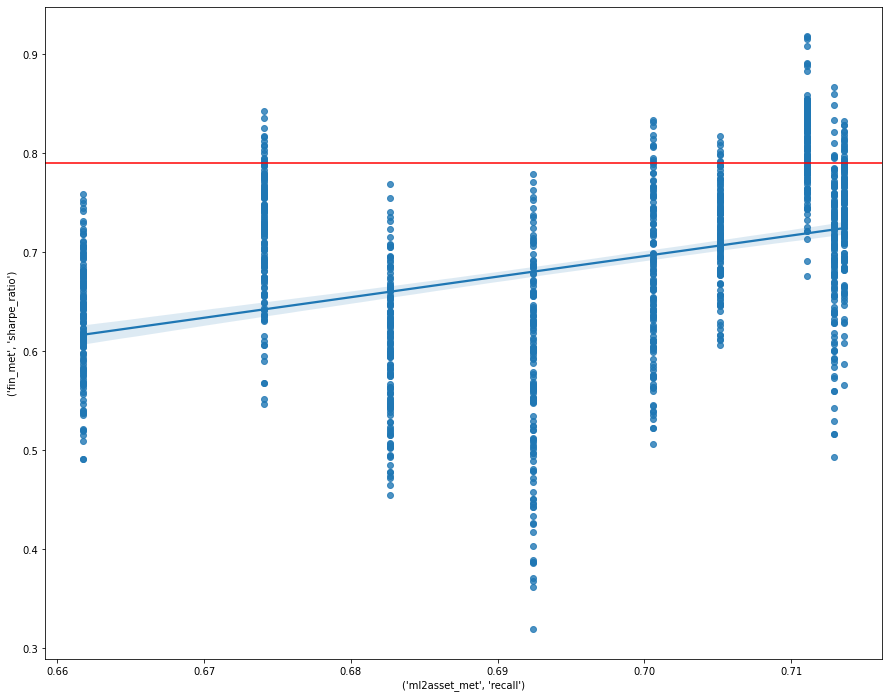

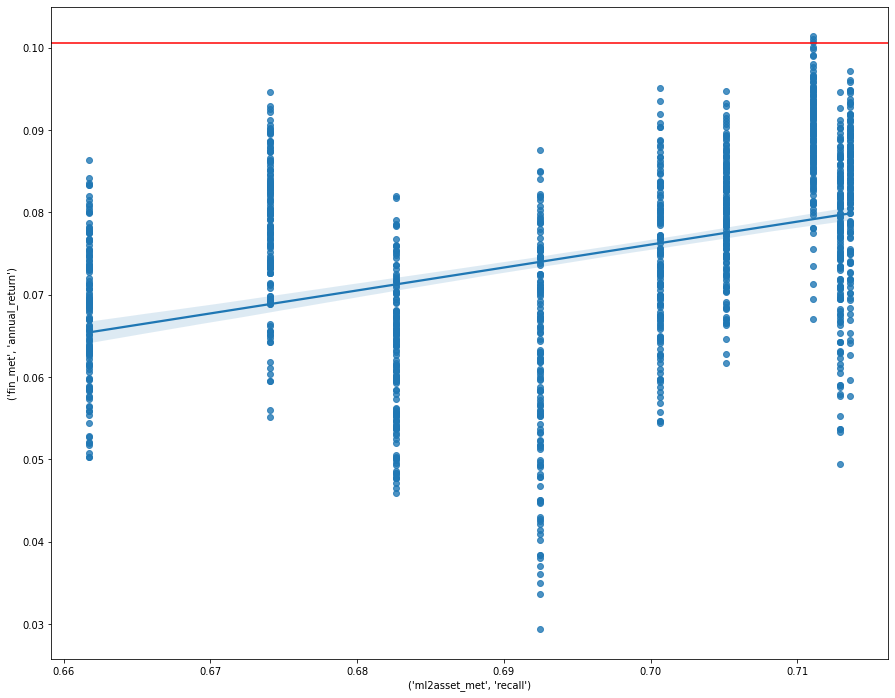

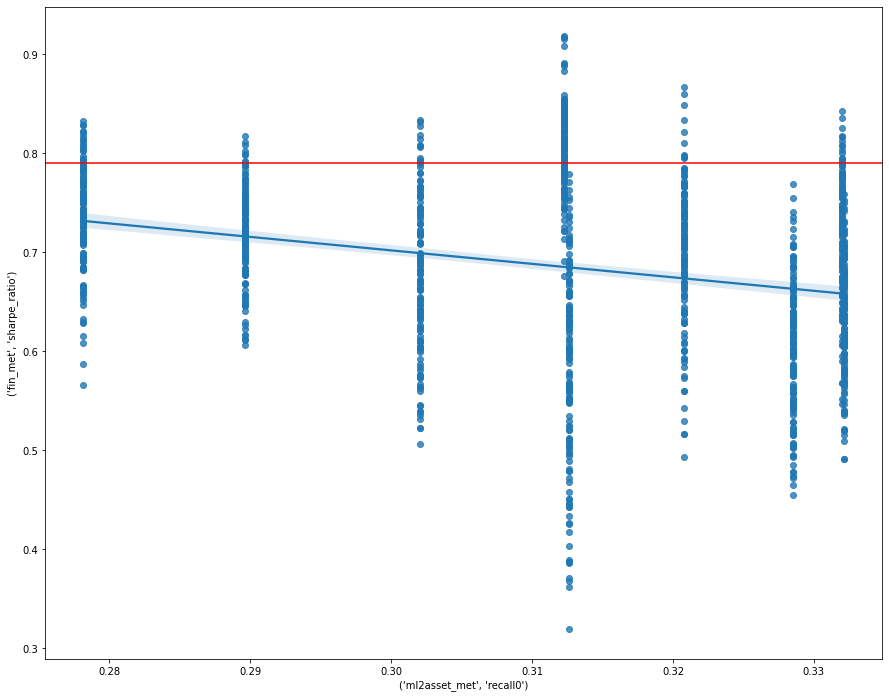

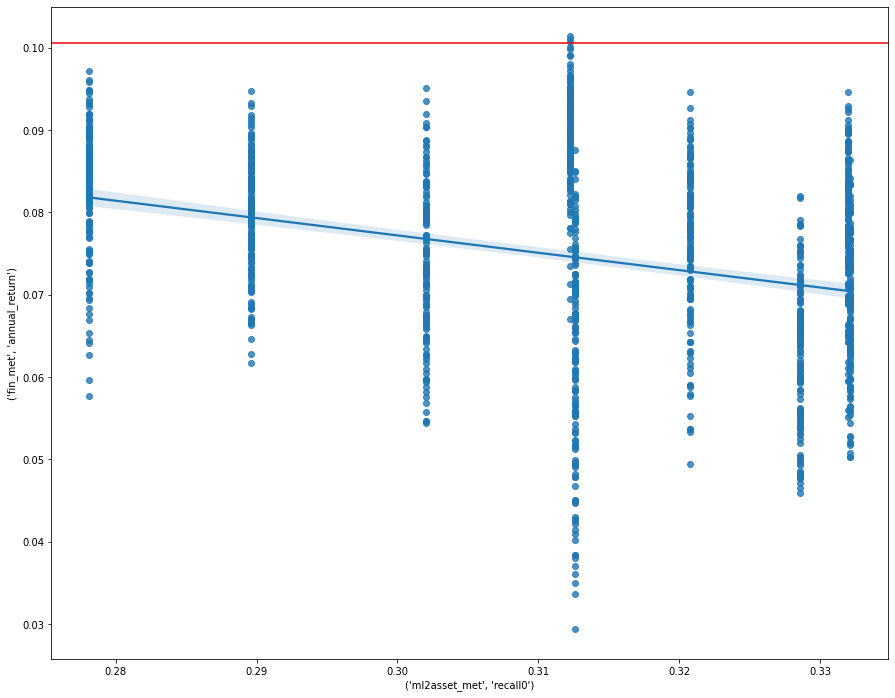

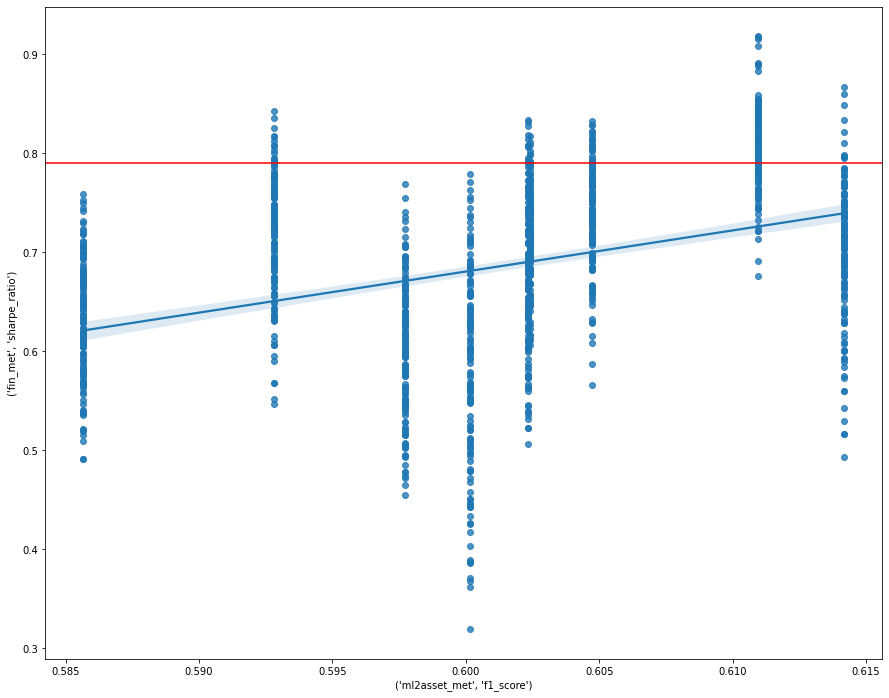

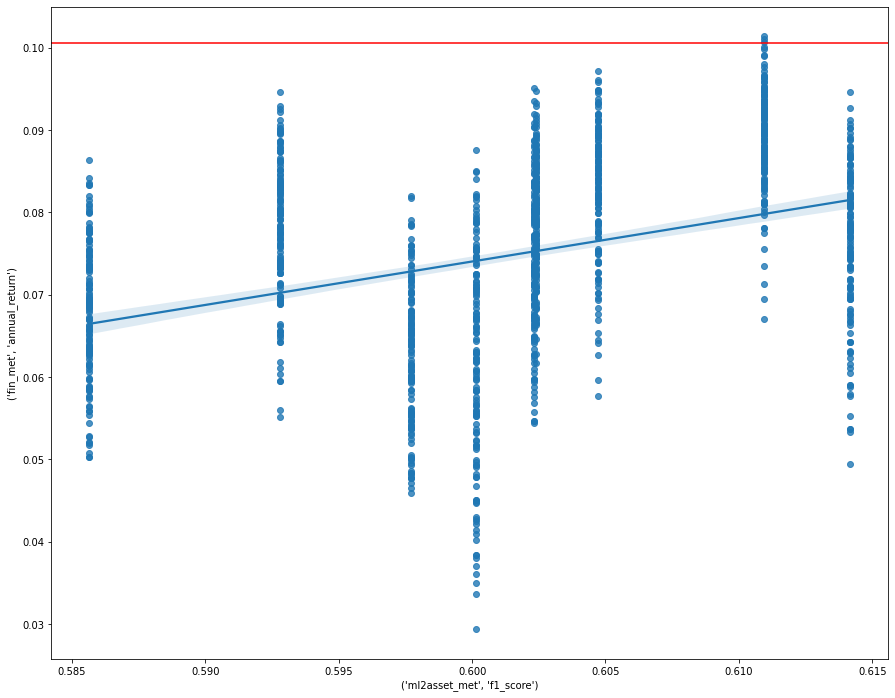

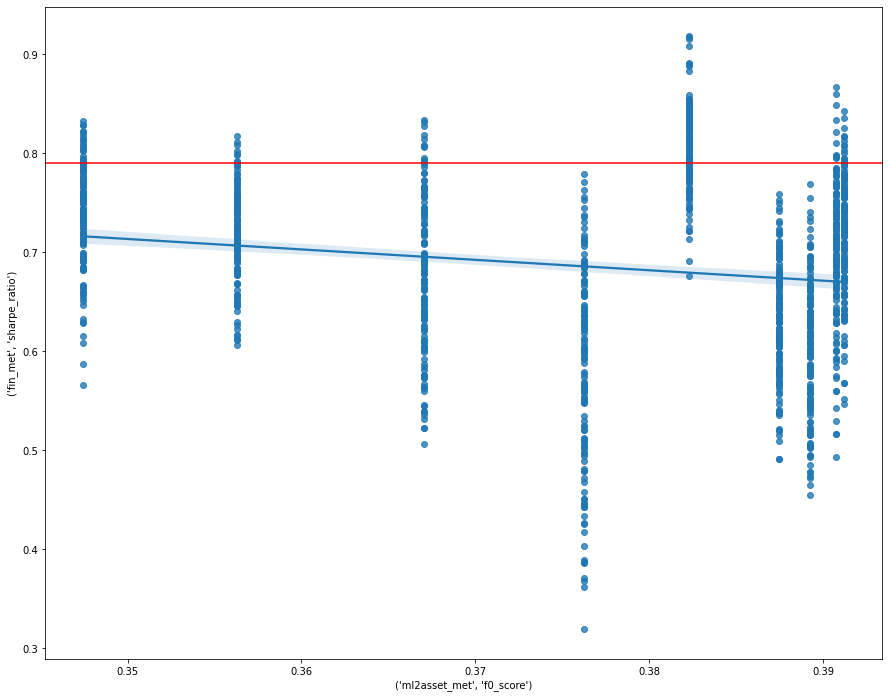

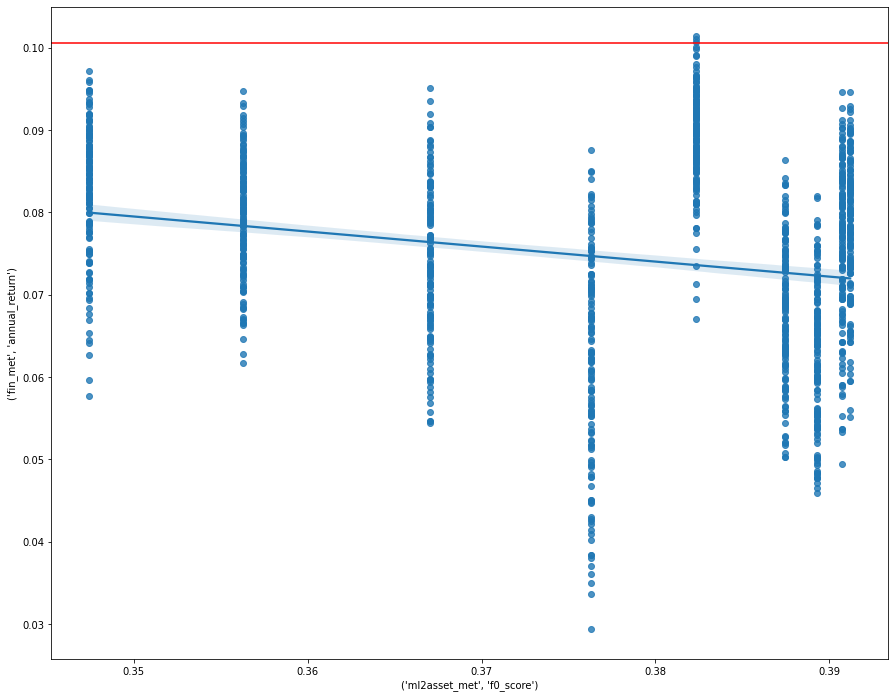

In [136]:
x1 = ['ml2portfolio_met', 'ml2asset_met']
x2 = ['accuracy', 'precision', 'recall', 'recall0', 'f1_score', 'f0_score']
y = [('fin_met', 'sharpe_ratio'), ('fin_met', 'annual_return')]

comb_df_case = comb_df.loc[comb_df.index.get_level_values(0)!='no_3vote']
no3vote = comb_df.loc[comb_df.index.get_level_values(0)=='no_3vote']
res = pd.DataFrame()
for x in x1:
    for xx in x2:
        plotx = comb_df_case[(x, xx)]
        for yy in y:
            ploty = comb_df_case[yy]
            plt.figure(figsize=(15, 12))
            ax = sns.regplot(x=plotx, y=ploty)
            plt.axhline(y=no3vote[yy].values[0], color='r', linestyle='-')
            slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),y=ax.get_lines()[0].get_ydata())
            ser = pd.Series(
                [(x, xx), yy, slope, intercept, r_value, p_value, std_err], 
                index=['x', 'y', 'slope', 'intercept', 'r_value', 'p_value', 'std_err']
            )
            
            # display(ser)
            res = pd.concat([res, ser], axis=1)
# res

In [128]:
tt = res.T.sort_values(['slope', 'intercept'], ascending=False)
tt

,,slope,intercept,r_value,p_value,std_err
x,y,,,,,
"(ml2portfolio_met, precision)","(fin_met, sharpe_ratio)",18.459301,-9.574044,1.0,0.0,0.0
"(ml2portfolio_met, accuracy)","(fin_met, sharpe_ratio)",6.831057,-2.941856,1.0,0.0,0.0
"(ml2asset_met, f1_score)","(fin_met, sharpe_ratio)",4.151996,-1.810695,1.0,0.0,0.0
"(ml2asset_met, accuracy)","(fin_met, sharpe_ratio)",2.909052,-0.812282,1.0,0.0,0.0
"(ml2asset_met, precision)","(fin_met, sharpe_ratio)",2.702247,-0.747068,1.0,0.0,0.0
"(ml2portfolio_met, precision)","(fin_met, annual_return)",2.20601,-1.151412,1.0,0.0,0.0
"(ml2asset_met, recall)","(fin_met, sharpe_ratio)",2.07606,-0.757158,1.0,0.0,0.0
"(ml2portfolio_met, f1_score)","(fin_met, sharpe_ratio)",1.499107,-0.275825,1.0,0.0,0.0
"(ml2portfolio_met, accuracy)","(fin_met, annual_return)",1.141053,-0.531239,1.0,0.0,0.0


In [129]:
tt.to_csv('./result/2022/202205v0_till202208/pp10/regress_res.csv')

In [31]:
comb_df.groupby(level=0).mean().sort_values([('ml2asset_met', 'f1_score')], ascending=False).T

case                                     Top5NNLow1Corr_byAccuracy  \
fin_met          total_return                             1.934906   
                 annual_return                            0.076165   
                 sharpe_ratio                             0.699335   
                 annual_volatility                        0.114186   
                 max_drawdown                            -0.172166   
                 avg_drawdown                            -0.043987   
                 return/maxdd                             0.443667   
                 return/avgdd                             1.743372   
                 up_ratio                                 0.750112   
                 buy_ratio                                0.787595   
                 flip_ratio                               0.034128   
ml2portfolio_met accuracy                                 0.528089   
                 precision                                0.554304   
                 recall                                   0.751354   
                 recall0                                  0.251427   
                 f1_score                                 0.637369   
                 f0_score                                 0.319963   
ml2asset_met     accuracy                                 0.528216   
                 precision                                0.539523   
                 recall                                   0.712899   
                 recall0                                  0.320797   
                 f1_score                                 0.614171   
                 f0_score                                 0.390755   
                 MSE                                      1.219394   
                 MSE_fullscore                            0.519972   
                 MSE_byProba                              1.089424   
                 MSE_fullscore_byReturn                   1.218853   

case                                     Top5NNLow1Corr_byMSE  Top10_byMSE  \
fin_met          total_return                        2.475418     2.187202   
                 annual_return                       0.089061     0.082436   
                 sharpe_ratio                        0.808129     0.736268   
                 annual_volatility                   0.113544     0.116675   
                 max_drawdown                       -0.174195    -0.210896   
                 avg_drawdown                       -0.041634    -0.052648   
                 return/maxdd                        0.513698     0.392354   
                 return/avgdd                        2.151119     1.575171   
                 up_ratio                            0.763536     0.780574   
                 buy_ratio                           0.799005     0.813488   
                 flip_ratio                          0.032929     0.030647   
ml2portfolio_met accuracy                            0.531511     0.535198   
                 precision                           0.555610     0.556743   
                 recall                              0.766574     0.785298   
                 recall0                             0.240229     0.225281   
                 f1_score                            0.643704     0.651074   
                 f0_score                            0.311609     0.299743   
ml2asset_met     accuracy                            0.523226     0.508710   
                 precision                           0.535545     0.524761   
                 recall                              0.711102     0.713605   
                 recall0                             0.312236     0.278128   
                 f1_score                            0.610953     0.604723   
                 f0_score                            0.382320     0.347433   
                 MSE                                 1.227031     1.242935   
                 MSE_fullscore                       0.519972     0.519972   
           

In [30]:
comb_df.groupby(level=[0, 1]).mean().sort_values([('ml2portfolio_met', 'precision')], ascending=False).T

case                                         Top5AllLow1Corr_byAccuracy  \
continue                                cont1quit_cont4back_rb_lookback   
fin_met          total_return                                  2.154539   
                 annual_return                                 0.082000   
                 sharpe_ratio                                  0.801239   
                 annual_volatility                             0.105260   
                 max_drawdown                                 -0.164029   
                 avg_drawdown                                 -0.041994   
                 return/maxdd                                  0.501177   
                 return/avgdd                                  1.961251   
                 up_ratio                                      0.652589   
                 buy_ratio                                     0.704700   
                 flip_ratio                                    0.039837   
ml2portfolio_met accuracy                                      0.532425   
                 precision                                     0.565762   
                 recall                                        0.667159   
                 recall0                                       0.365467   
                 f1_score                                      0.612291   
                 f0_score                                      0.411119   
ml2asset_met     accuracy                                      0.513246   
                 precision                                     0.528827   
                 recall                                        0.700626   
                 recall0                                       0.302016   
                 f1_score                                      0.602332   
                 f0_score                                      0.367052   
                 MSE                                           1.231093   
                 MSE_fullscore                                 0.519972   
                 MSE_byProba                                   1.093791   
                 MSE_fullscore_byReturn                        1.218853   

case                                                                     \
continue                                cont1quit_cont3back_rb_lookback   
fin_met          total_return                                  1.812121   
                 annual_return                                 0.073444   
                 sharpe_ratio                                  0.711593   
                 annual_volatility                             0.107716   
                 max_drawdown                                 -0.173352   
                 avg_drawdown                                 -0.045582   
                 return/maxdd                                  0.424695   
                 return/avgdd                                  1.620155   
                 up_ratio                                      0.679837   
                 buy_ratio                                     0.727861   
                 flip_ratio                                    0.046322   
ml2portfolio_met accuracy                                      0.534605   
                 precision                                     0.564729   
                 recall                                        0.693747   
                 recall0                                       0.337401   
                 f1_score                                      0.622625   
                 f0_score                                      0.393035   
ml2asset_met     accuracy                                      0.513246   
                 precision                                     0.528827   
                 recall                                        0.700626   
                 recall0                                       0.302016   
                 f1_score                                      0.602332   
                 f0_scor